In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import ast
from itertools import combinations
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def perform_cluster_movie_eda(cluster_movie_df):
    """
    Perform EDA on the cluster_movie_df DataFrame.
    Prints and plots stats for genres and titles.

    Args:
        cluster_movie_df (pd.DataFrame): DataFrame containing 'Genre_List' and 'Title' columns.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from wordcloud import WordCloud
    import ast
    from itertools import combinations
    import numpy as np
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    # Preprocess Genre_List column
    cluster_movie_df['Genre_List'] = cluster_movie_df['Genre_List'].apply(ast.literal_eval)

    print("### Genre Analysis ###")

    # Genre Frequency Analysis
    all_genres = [genre for genres in cluster_movie_df['Genre_List'] for genre in genres]
    genre_counts = Counter(all_genres)
    genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
    print("\nTop Genres by Frequency:")
    print(genre_counts_df.head())

    # Plot Genre Frequency
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')
    plt.title("Frequency of Genres")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.grid()
    plt.show()

    # Word Cloud for Genres
    genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(genre_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Genres")
    plt.show()

    # Genre Combination Analysis
    genre_combinations = cluster_movie_df['Genre_List'].apply(tuple)  # Convert lists to tuples for counting
    combination_counts = Counter(genre_combinations)
    combination_counts_df = pd.DataFrame(combination_counts.items(), columns=['Genre_Combination', 'Count']).sort_values(by='Count', ascending=False)
    combination_counts_df['Genre_Combination'] = combination_counts_df['Genre_Combination'].apply(lambda x: ', '.join(x))  # Convert tuple to string
    print("\nTop 5 Genre Combinations:")
    print(combination_counts_df.head())

    # Plot Top Genre Combinations
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Genre_Combination', data=combination_counts_df.head(10), palette='plasma')
    plt.title("Top 10 Genre Combinations")
    plt.xlabel("Count")
    plt.ylabel("Genre Combination")
    plt.grid()
    plt.show()

    # Genre Co-occurrence Matrix
    unique_genres = list(set(all_genres))
    genre_to_index = {genre: i for i, genre in enumerate(unique_genres)}

    co_occurrence_matrix = np.zeros((len(unique_genres), len(unique_genres)), dtype=int)
    for genres in cluster_movie_df['Genre_List']:
        for genre1, genre2 in combinations(genres, 2):
            i, j = genre_to_index[genre1], genre_to_index[genre2]
            co_occurrence_matrix[i, j] += 1
            co_occurrence_matrix[j, i] += 1

    co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=unique_genres, columns=unique_genres)

    # Plot Co-occurrence Matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(co_occurrence_df, cmap='Blues', square=True, annot=False, cbar=True)
    plt.title("Genre Co-occurrence Matrix")
    plt.show()

    print("\n### Title Analysis ###")

    # Word Cloud for Titles
    title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_movie_df['Title']))
    plt.figure(figsize=(10, 6))
    plt.imshow(title_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Movie Titles")
    plt.show()

    # Title Length Analysis
    cluster_movie_df['Title_Length'] = cluster_movie_df['Title'].str.len()
    print("\nTitle Length Statistics:")
    print(cluster_movie_df['Title_Length'].describe())

    # Plot Title Length Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(cluster_movie_df['Title_Length'], bins=30, kde=True, color='purple')
    plt.title("Distribution of Title Lengths")
    plt.xlabel("Title Length")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

    # Similarity Between Titles Using TF-IDF
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(cluster_movie_df['Title'])
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Example: Print Top 5 Similar Titles for the First Movie
    similarity_df = pd.DataFrame(cosine_sim[0], columns=['Similarity'], index=cluster_movie_df['Title'])
    print("\nTop 5 Similar Titles to the First Movie:")
    print(similarity_df.sort_values(by='Similarity', ascending=False).head(5))



In [34]:

from sklearn.preprocessing import LabelEncoder

In [2]:
import os

In [3]:
import yaml

In [4]:
import torch

In [5]:
def load_config(config_path):
    with open(config_path, 'rb') as f:
        config = yaml.safe_load(f)
    return config


config_path = 'config.yaml'
config = load_config(config_path)

In [6]:
embeddings = torch.load(os.path.join(config['embeddings_root_path'], 'embeddings.pts'))

/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3364617991.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(os.path.join(config['

In [7]:
user_embeddings = embeddings['user']
movie_embeddings = embeddings['movie']

In [29]:
# Step 2: Normalize the embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(user_embeddings)

# Step 3: Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=2000)

In [30]:
embeddings_2d = tsne.fit_transform(embeddings_scaled)

/Users/ashish.kumarsinha/Documents/workspace/gnn/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [31]:
embeddings_2d.shape

(6040, 2)

Silhouette Score: -0.2595


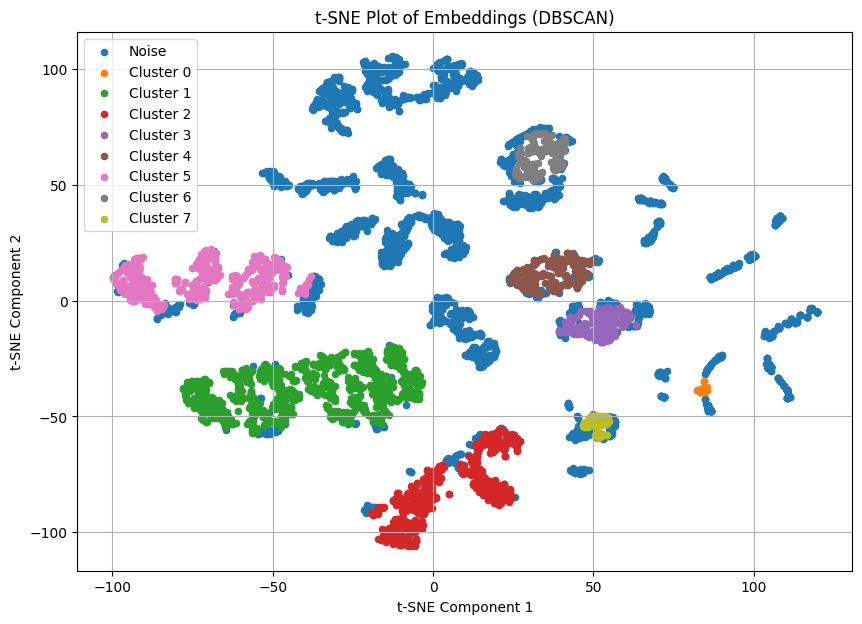

In [56]:
# Step 4: Clustering with DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=50)  # Adjust eps and min_samples based on your data
cluster_labels = dbscan.fit_predict(embeddings_scaled)

# Evaluate clustering (optional: only valid if there are more than 1 cluster)
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(embeddings_scaled, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score: Cannot be calculated (only one cluster or all noise).")

# Step 5: Plot the t-SNE with cluster labels
plt.figure(figsize=(10, 7))

# Handle noise points (-1 label)
for cluster in np.unique(cluster_labels):
    cluster_points = embeddings_2d[cluster_labels == cluster]
    label = f"Cluster {cluster}" if cluster != -1 else "Noise"
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=label, s=20)

plt.title("t-SNE Plot of Embeddings (DBSCAN)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid()
plt.show()

In [12]:
users = pd.read_csv(os.path.join(config['transformed_data_root_path'], 'users.csv'))
movies = pd.read_csv(os.path.join(config['transformed_data_root_path'], 'movies.csv'))
train_ratings = pd.read_csv(os.path.join(config['transformed_data_root_path'], 'train_ratings.csv'))
user_classes =  np.load(os.path.join(config['transformed_data_root_path'], 'user_encoder.npy'))
movie_classes = np.load(os.path.join(config['transformed_data_root_path'], 'movie_encoder.npy'))

user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
user_encoder.classes_ = user_classes
movie_encoder.classes_ = movie_classes

In [13]:
train_ratings['UserID'] = user_encoder.transform(train_ratings['UserID'])
train_ratings['MovieID'] = movie_encoder.transform(train_ratings['MovieID'])

In [15]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,0,0,1,10,48067
1,1,1,56,16,70072
2,2,1,25,15,55117
3,3,1,45,7,02460
4,4,1,25,20,55455
...,...,...,...,...,...
6035,6035,0,25,15,32603
6036,6036,0,45,1,76006
6037,6037,0,56,1,14706
6038,6038,0,45,0,01060


In [16]:
movies

,MovieID,Title,Genres,Year,Genre_List,Genre_Embedding,Title_List,Title_Embedding
0,0,Toy Story,Animation|Children's|Comedy,1995,"['animation', ""children's"", 'comedy']","[0.0414225272834301, -0.015869140625, -0.01357...","['toy', 'story']","[0.135498046875, 0.09771728515625, -0.06188964..."
1,1,Jumanji,Adventure|Children's|Fantasy,1995,"['adventure', ""children's"", 'fantasy']","[0.1847330778837204, -0.0461018867790699, -0.0...",['jumanji'],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,Grumpier Old Men,Comedy|Romance,1995,"['comedy', 'romance']","[0.1038818359375, -0.1229248046875, -0.1260681...","['grumpier', 'old', 'men']","[0.1028645858168602, 0.1243489608168602, 0.065..."
3,3,Waiting to Exhale,Comedy|Drama,1995,"['comedy', 'drama']","[0.0848388671875, -0.0098876953125, 0.00552368...","['waiting', 'exhale']","[0.12060546875, 0.0087890625, 0.29052734375, 0..."
4,4,Father of the Bride Part II,Comedy,1995,['comedy'],"[-0.029541015625, -0.058349609375, -0.00213623...","['father', 'bride', 'ii']","[-0.0677083358168602, -0.0944010391831398, 0.0..."
...,...,...,...,...,...,...,...,...
3878,3878,Meet the Parents,Comedy,2000,['comedy'],"[-0.029541015625, -0.058349609375, -0.00213623...","['meet', 'parents']","[-0.194091796875, -0.03369140625, 0.0590820312..."
3879,3879,Requiem for a Dream,Drama,2000,['drama'],"[0.19921875, 0.03857421875, 0.01318359375, 0.0...","['requiem', 'dream']","[0.048095703125, -0.06427001953125, 0.12304687..."
3880,3880,Tigerland,Drama,2000,['drama'],"[0.19921875, 0.03857421875, 0.01318359375, 0.0...",['tigerland'],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3881,3881,Two Family House,Drama,2000,['drama'],"[0.19921875, 0.03857421875, 0.01318359375, 0.0...","['family', 'house']","[0.0692138671875, -0.094482421875, -0.04479980..."


In [17]:
train_ratings

,index,UserID,MovieID,Rating,Timestamp
0,1000138,6039,847,4,2000-04-25 23:05:32
1,1000153,6039,2315,4,2000-04-25 23:05:54
2,999873,6039,589,5,2000-04-25 23:05:54
3,1000007,6039,1892,4,2000-04-25 23:06:17
4,1000192,6039,1950,5,2000-04-25 23:06:17
...,...,...,...,...,...
800163,314151,1874,880,4,2000-12-02 14:51:59
800164,314073,1874,436,4,2000-12-02 14:52:18
800165,314225,1874,505,4,2000-12-02 14:52:18
800166,313950,1874,1996,4,2000-12-02 14:52:18


In [75]:
for i in range(8):
    print(i, users.loc[cluster_labels == i]['Age'].unique())

0 [18]
1 [25]
2 [18]
3 [35]
4 [35]
5 [25]
6 [35]
7 [1]


In [106]:
users.loc[cluster_labels == i]

,UserID,Gender,Age,Occupation,Zip-code
752,752,1,1,10,42754
865,865,1,1,10,08820
887,887,0,1,10,08820
905,905,1,1,10,71106
959,959,1,1,10,45244
...,...,...,...,...,...
5661,5661,1,1,10,07960
5802,5802,1,1,10,01597
5843,5843,0,1,10,02131
5952,5952,1,1,10,21030


In [137]:
train_ratings = train_ratings[train_ratings['Rating'] >= 4]

In [166]:
def get_movie_cluster(cluster_id):
    cluster_movie = train_ratings[train_ratings['UserID'].isin(users.loc[cluster_labels == cluster_id]['UserID'].unique())]['MovieID'].unique()
    # train_ratings[train_ratings['UserID'].isin(users.loc[cluster_labels == cluster_id]['UserID'].unique())]['Rating']
    cluster_movie_df = movies[movies['MovieID'].isin(cluster_movie)]
    perform_cluster_movie_eda(cluster_movie_df)

/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Genre_List'] = cluster_movie_df['Genre_List'].apply(ast.literal_eval)
/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')


### Genre Analysis ###

Top Genres by Frequency:
      Genre  Count
6     drama   1055
2    comedy    898
7    action    423
9  thriller    413
5   romance    365


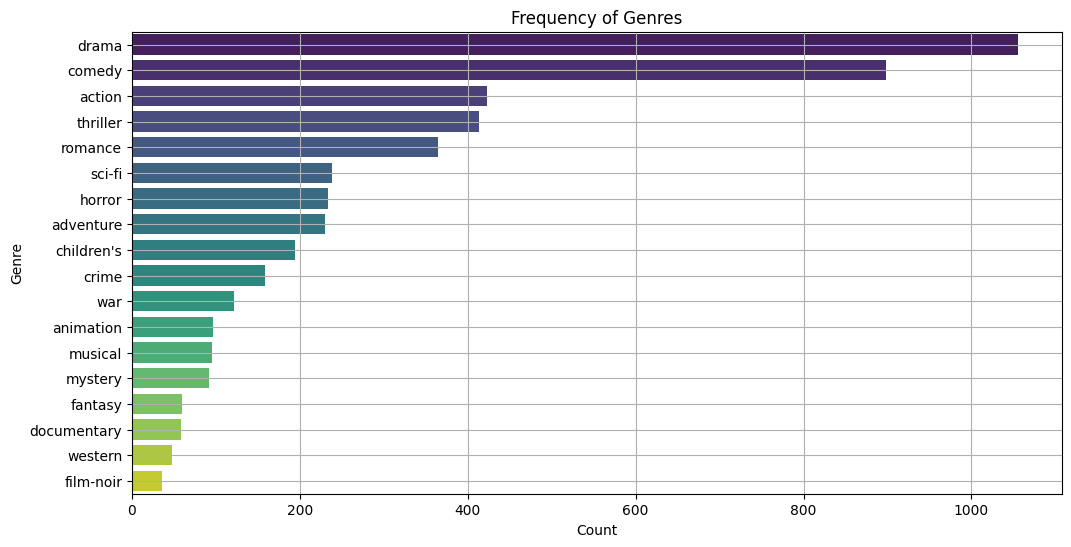

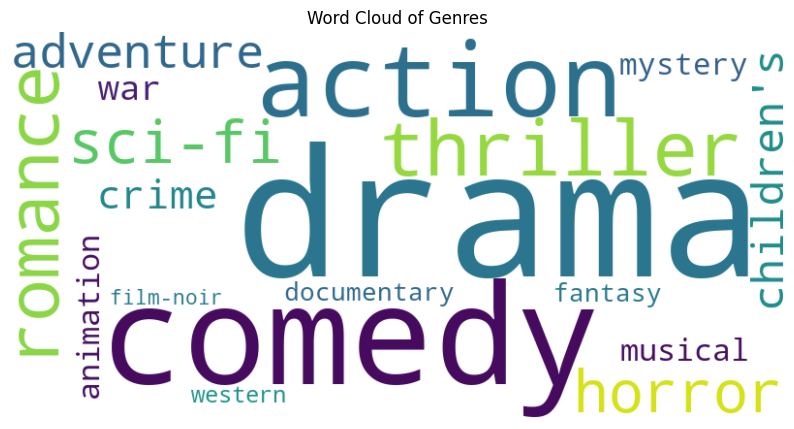


Top 5 Genre Combinations:
   Genre_Combination  Count
12             drama    478
4             comedy    353
2    comedy, romance    112
3      comedy, drama    112
40            horror    103


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre_Combination', data=combination_counts_df.head(10), palette='plasma')


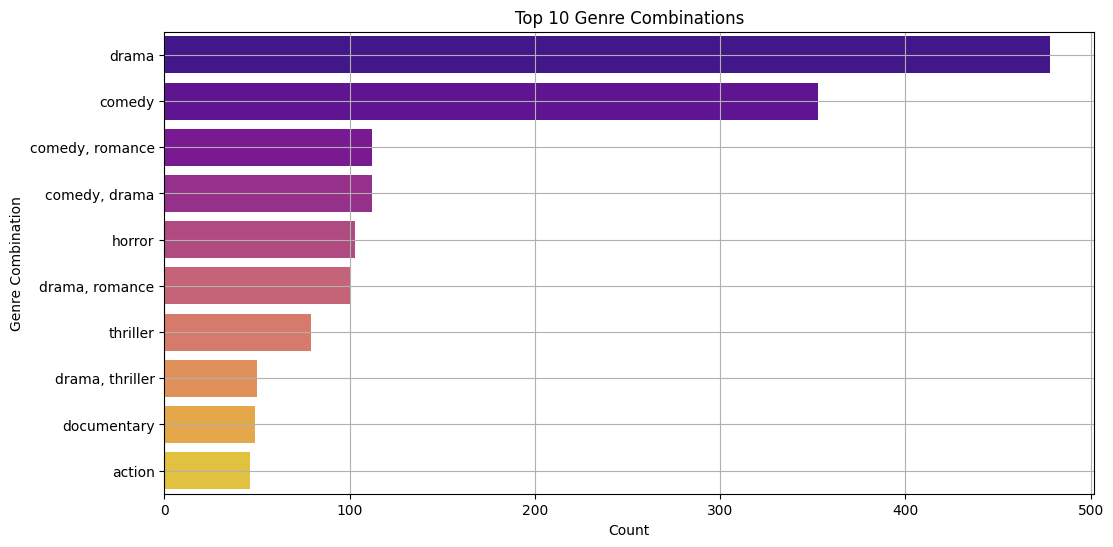

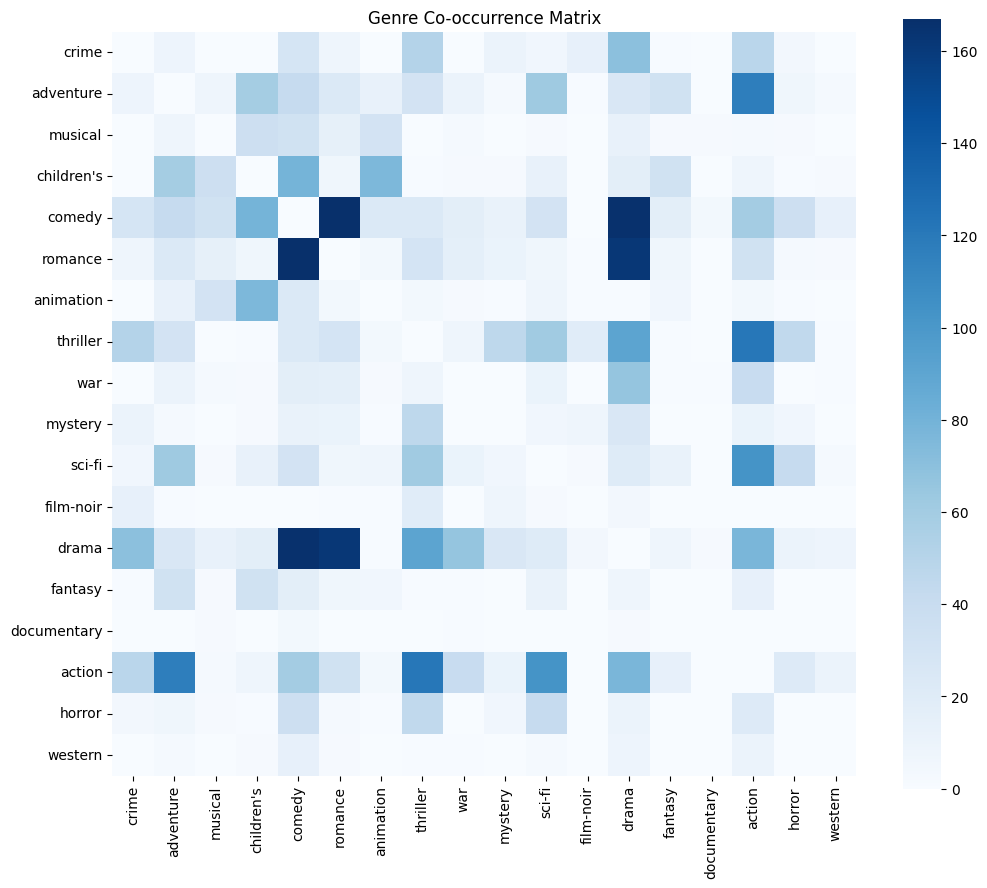


### Title Analysis ###


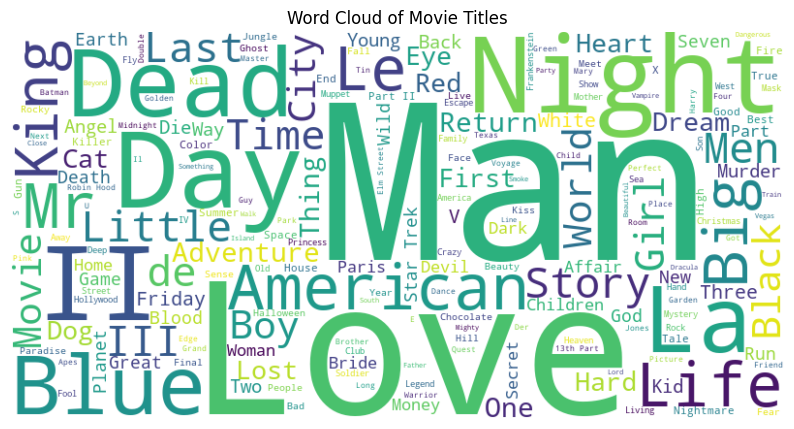

/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Title_Length'] = cluster_movie_df['Title'].str.len()



Title Length Statistics:
count    2712.000000
mean       16.760324
std         9.574269
min         1.000000
25%        10.000000
50%        15.000000
75%        21.000000
max        72.000000
Name: Title_Length, dtype: float64


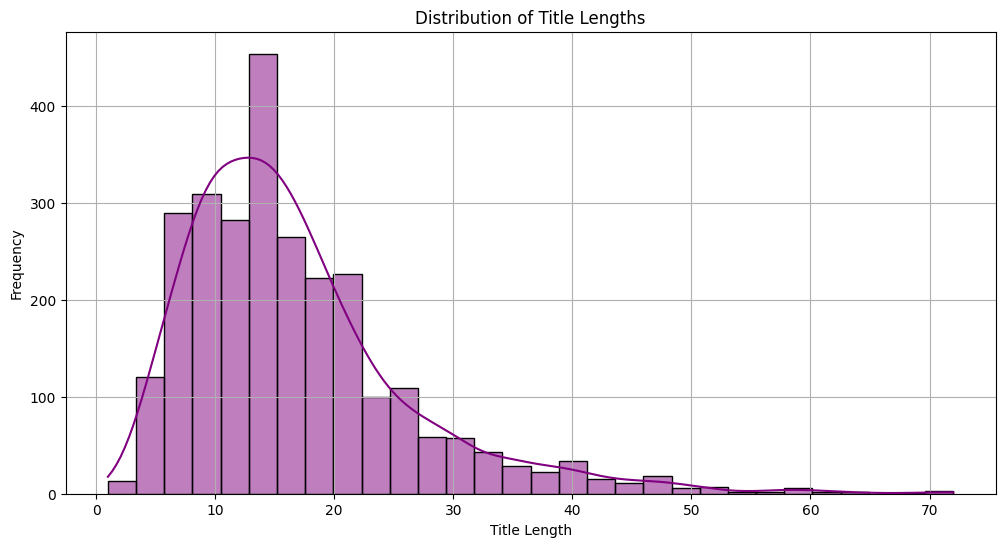


Top 5 Similar Titles to the First Movie:
                    Similarity
Title                         
Toy Story             1.000000
Toy Story 2           1.000000
L.A. Story            0.597325
Christmas Story, A    0.382975
Soldier's Story, A    0.372274


In [167]:
get_movie_cluster(5)

### Genre Analysis ###

Top Genres by Frequency:
      Genre  Count
6     drama   1012
2    comedy    891
7    action    417
9  thriller    384
5   romance    354


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Genre_List'] = cluster_movie_df['Genre_List'].apply(ast.literal_eval)
/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')


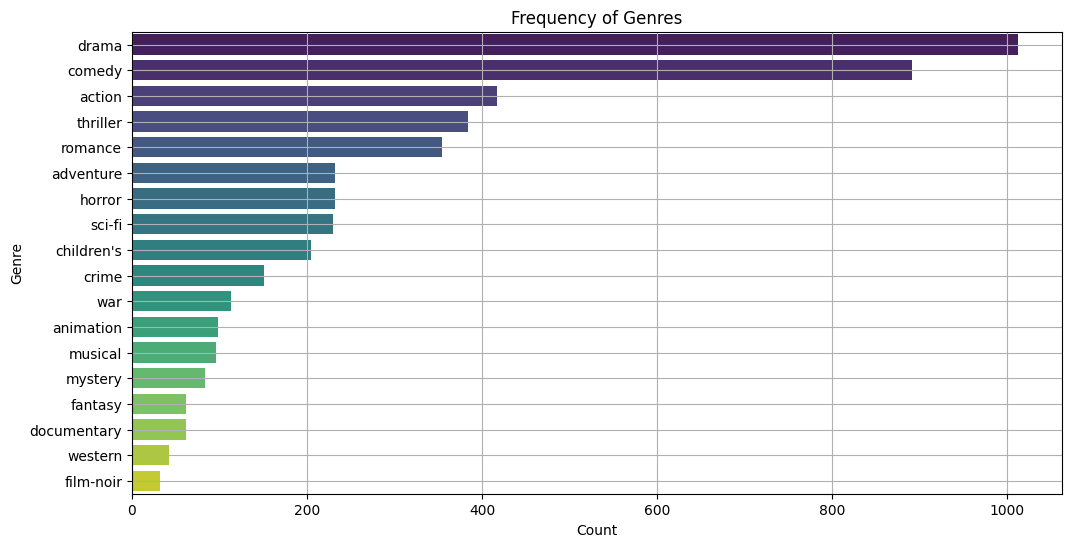

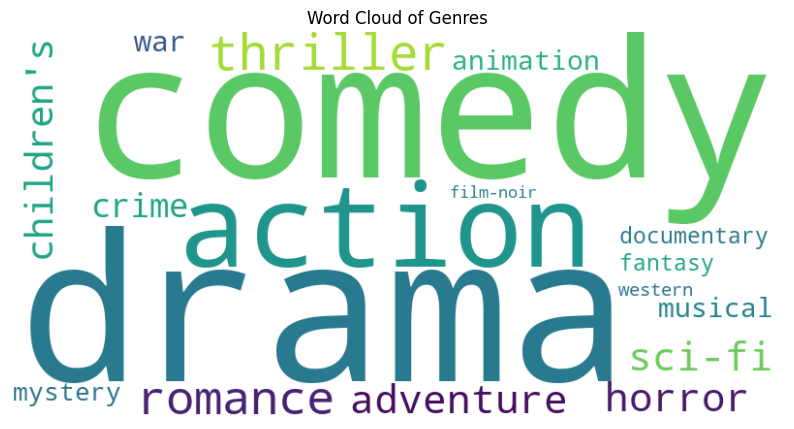


Top 5 Genre Combinations:
   Genre_Combination  Count
12             drama    455
4             comedy    361
3      comedy, drama    112
2    comedy, romance    107
42            horror    103


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre_Combination', data=combination_counts_df.head(10), palette='plasma')


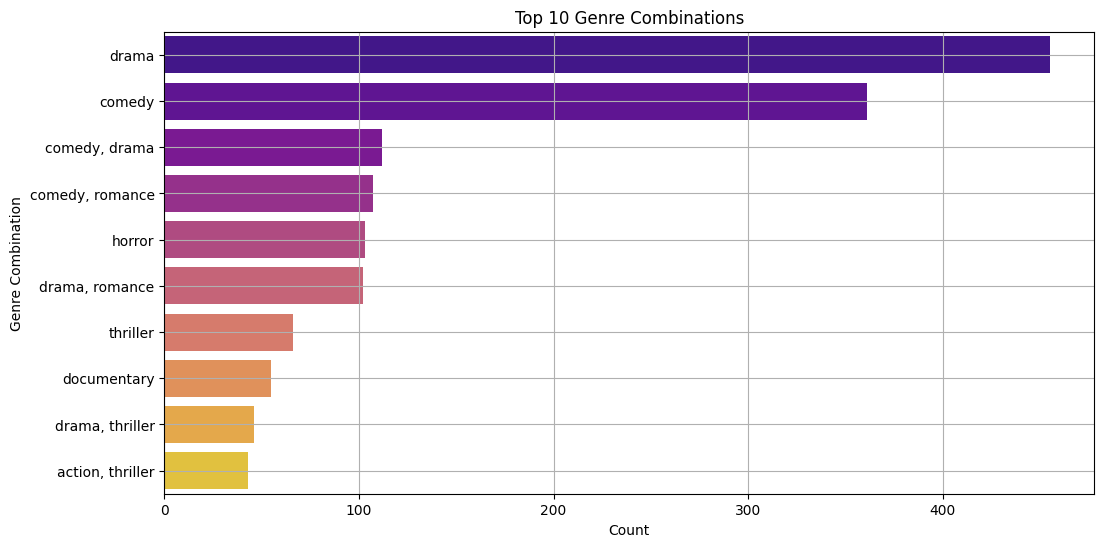

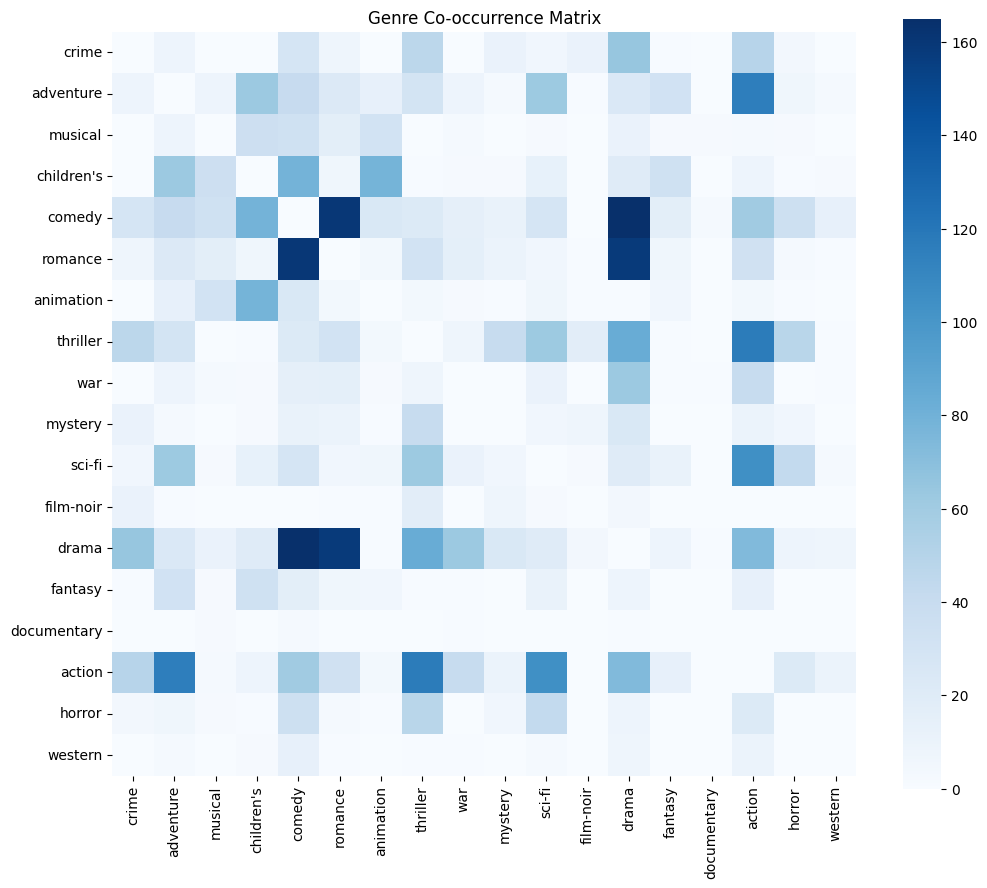


### Title Analysis ###


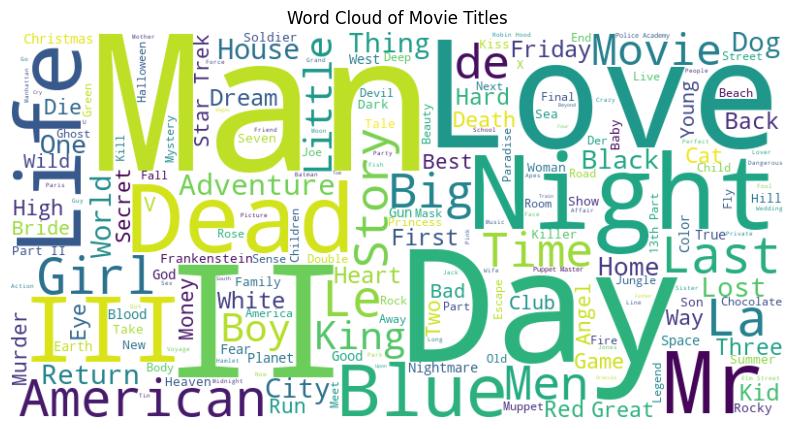

/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Title_Length'] = cluster_movie_df['Title'].str.len()



Title Length Statistics:
count    2634.000000
mean       16.802202
std         9.557707
min         1.000000
25%        10.000000
50%        15.000000
75%        21.000000
max        72.000000
Name: Title_Length, dtype: float64


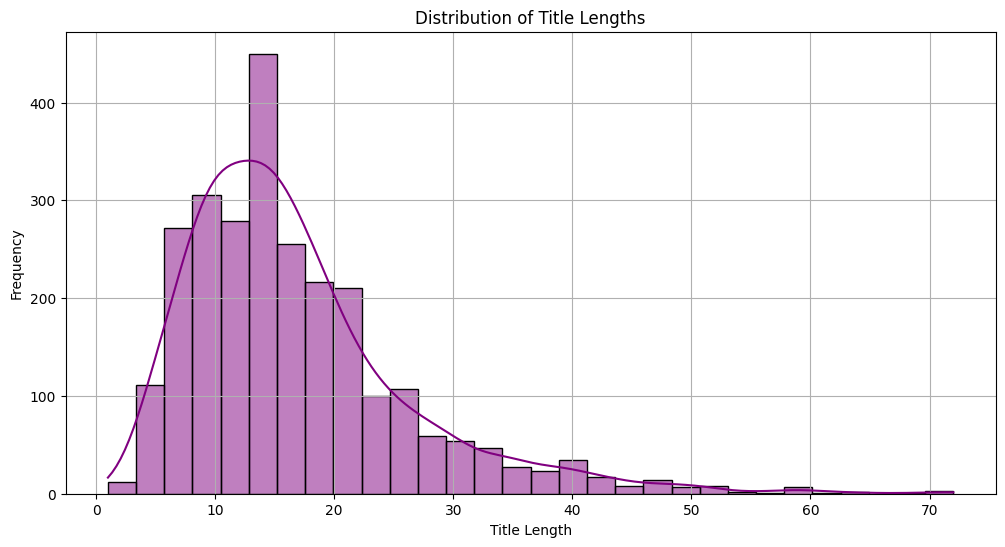


Top 5 Similar Titles to the First Movie:
                    Similarity
Title                         
Toy Story             1.000000
Toy Story 2           1.000000
L.A. Story            0.599908
Christmas Story, A    0.394568
Soldier's Story, A    0.381269


In [162]:
get_movie_cluster(2)

### Genre Analysis ###

Top Genres by Frequency:
      Genre  Count
6     drama    991
2    comedy    796
7    action    397
9  thriller    354
5   romance    331


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Genre_List'] = cluster_movie_df['Genre_List'].apply(ast.literal_eval)
/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')


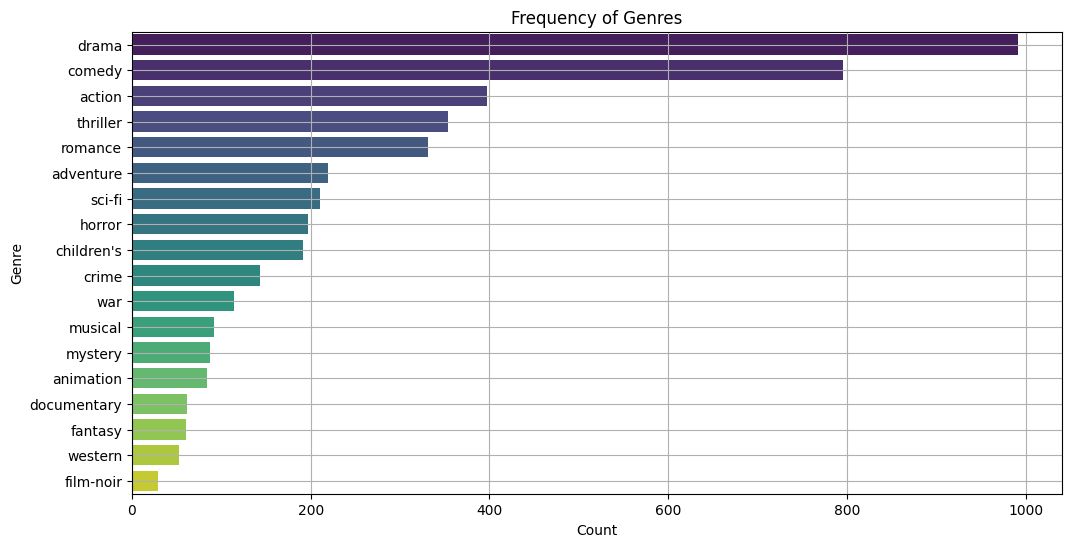

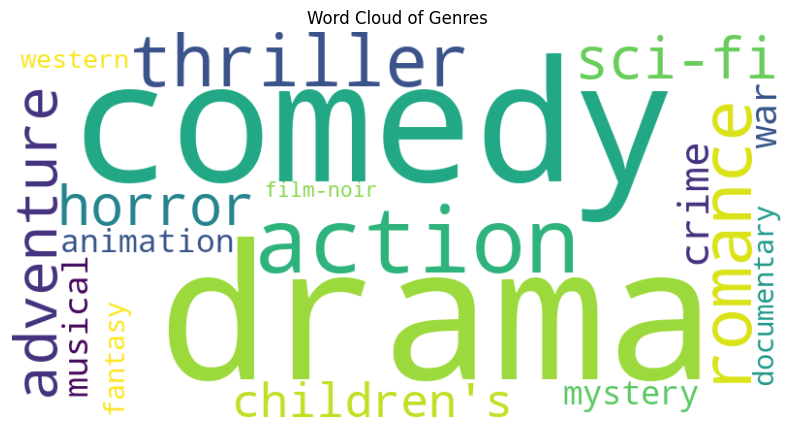


Top 5 Genre Combinations:
   Genre_Combination  Count
18             drama    450
4             comedy    291
3      comedy, drama    103
2    comedy, romance     95
13    drama, romance     94


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre_Combination', data=combination_counts_df.head(10), palette='plasma')


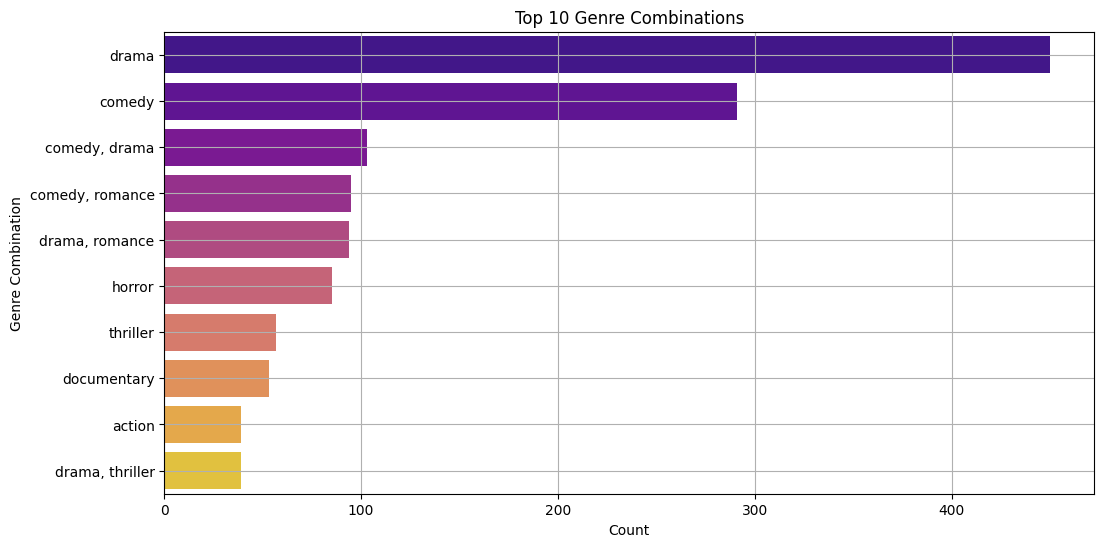

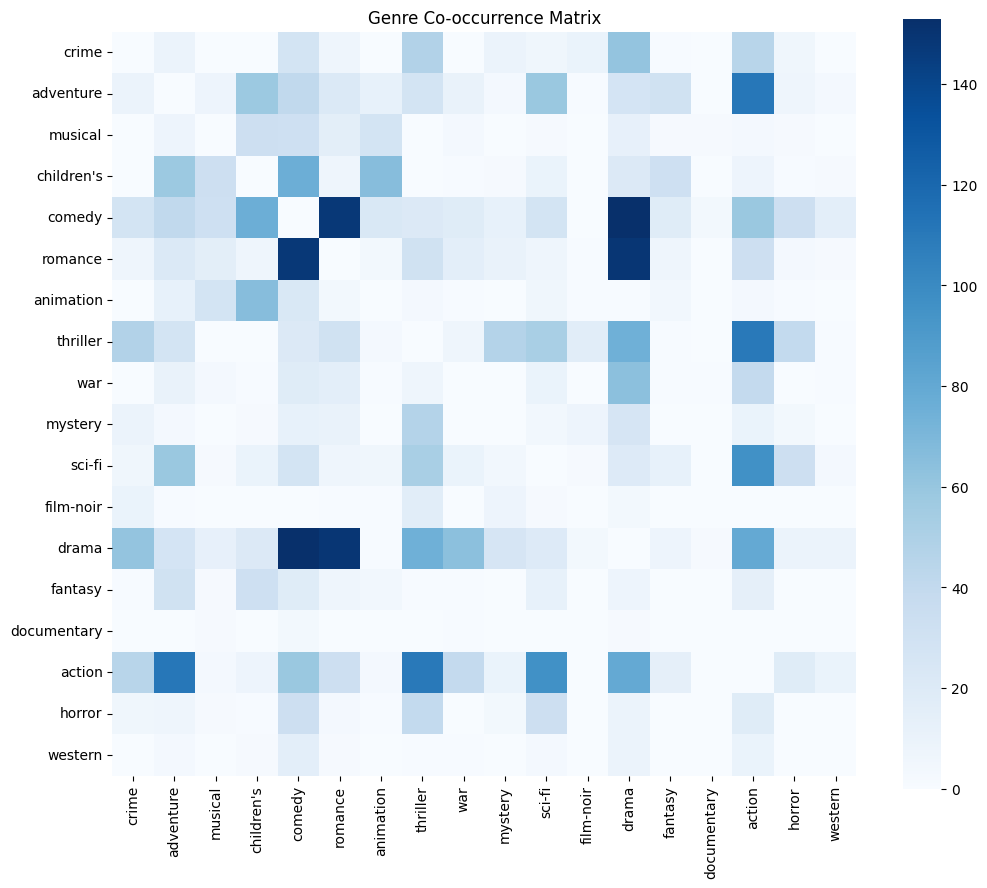


### Title Analysis ###


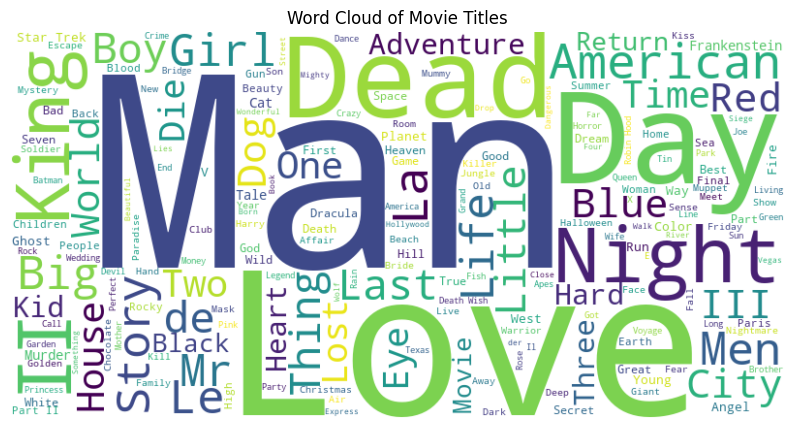

/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Title_Length'] = cluster_movie_df['Title'].str.len()



Title Length Statistics:
count    2455.000000
mean       16.931976
std         9.531265
min         1.000000
25%        10.000000
50%        15.000000
75%        21.000000
max        72.000000
Name: Title_Length, dtype: float64


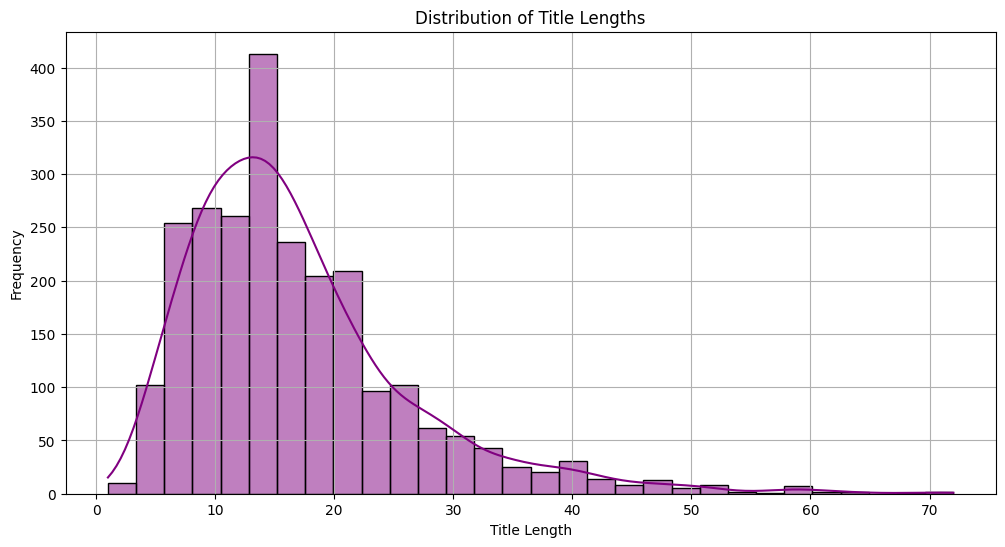


Top 5 Similar Titles to the First Movie:
                    Similarity
Title                         
Toy Story             1.000000
Toy Story 2           1.000000
L.A. Story            0.601974
Christmas Story, A    0.389060
Soldier's Story, A    0.378153


In [163]:
get_movie_cluster(3)

### Genre Analysis ###

Top Genres by Frequency:
      Genre  Count
9     drama    905
2    comedy    743
6    action    395
8  thriller    340
5   romance    309


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Genre_List'] = cluster_movie_df['Genre_List'].apply(ast.literal_eval)
/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')


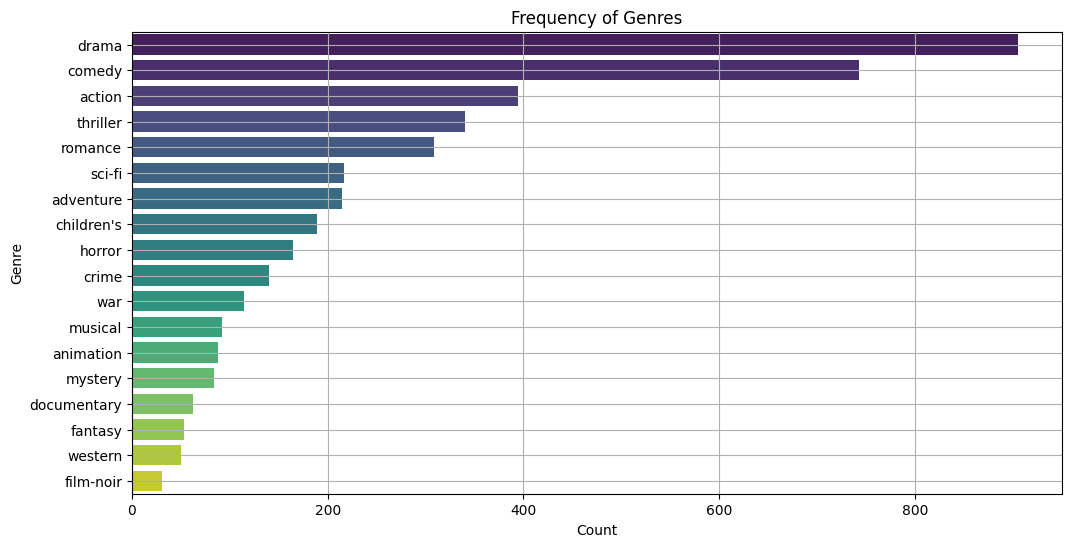

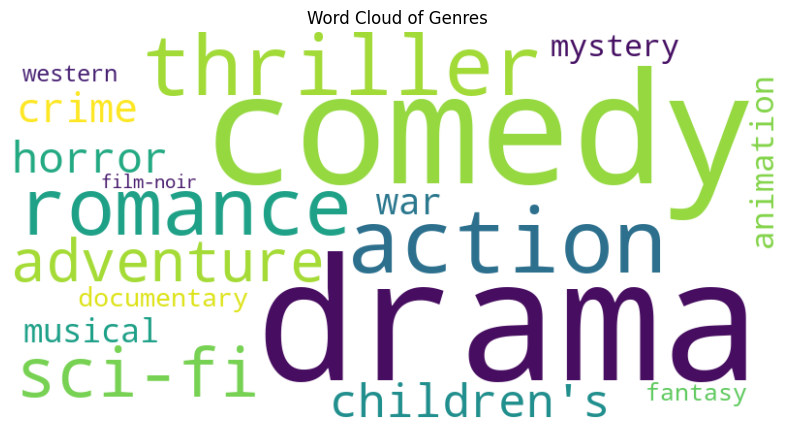


Top 5 Genre Combinations:
   Genre_Combination  Count
10             drama    403
3             comedy    283
2    comedy, romance     86
25     comedy, drama     84
13    drama, romance     84


/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre_Combination', data=combination_counts_df.head(10), palette='plasma')


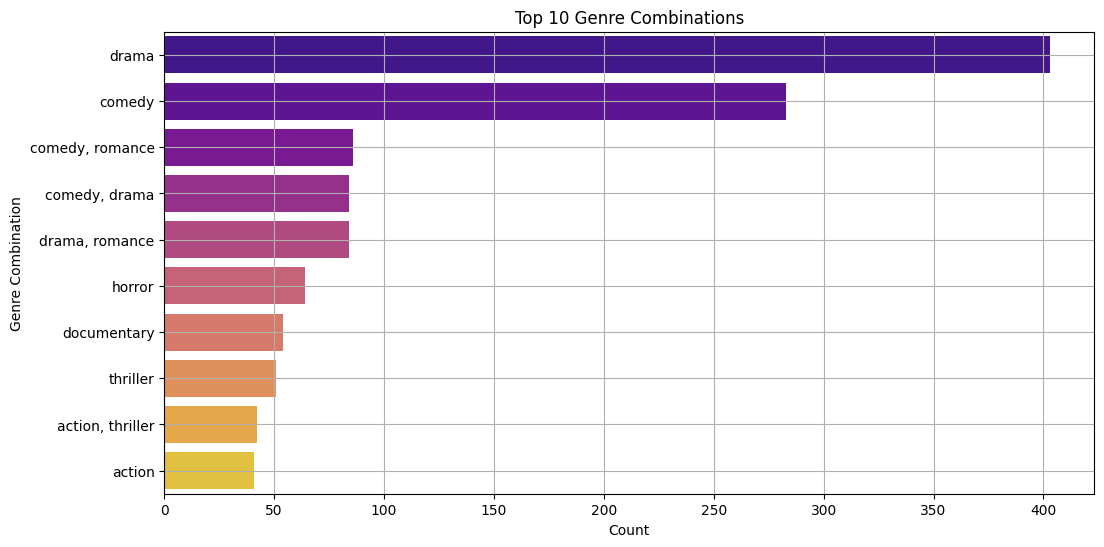

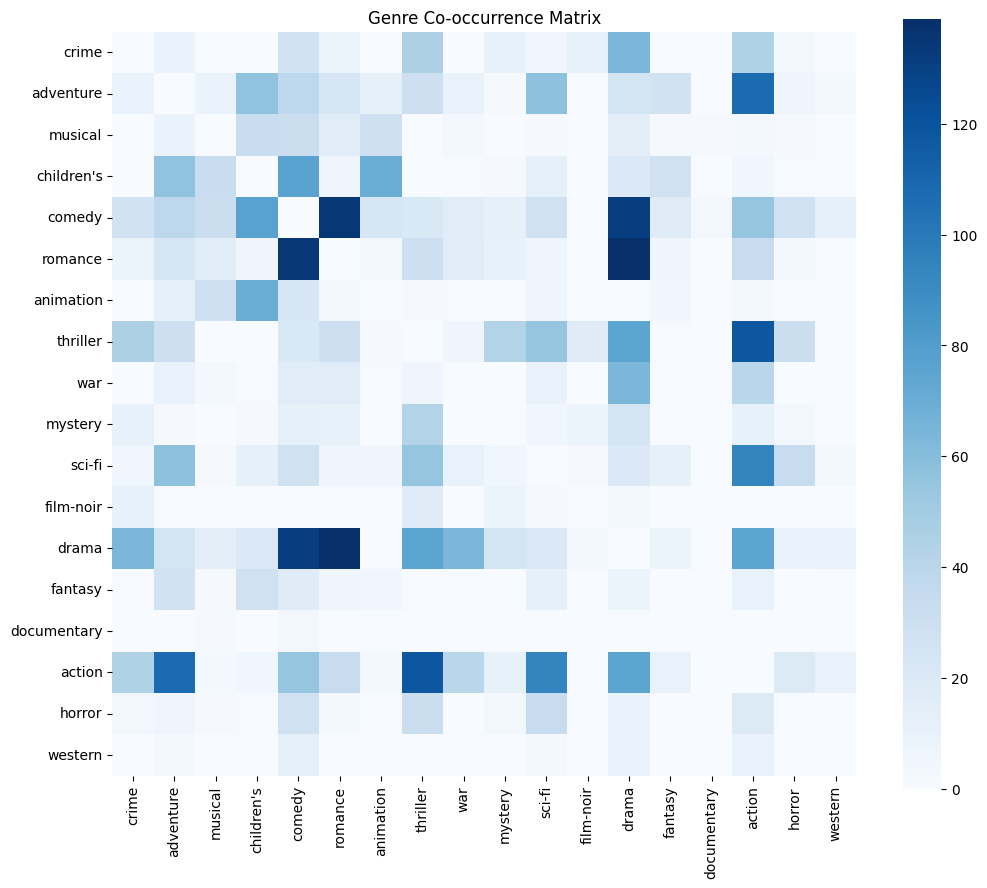


### Title Analysis ###


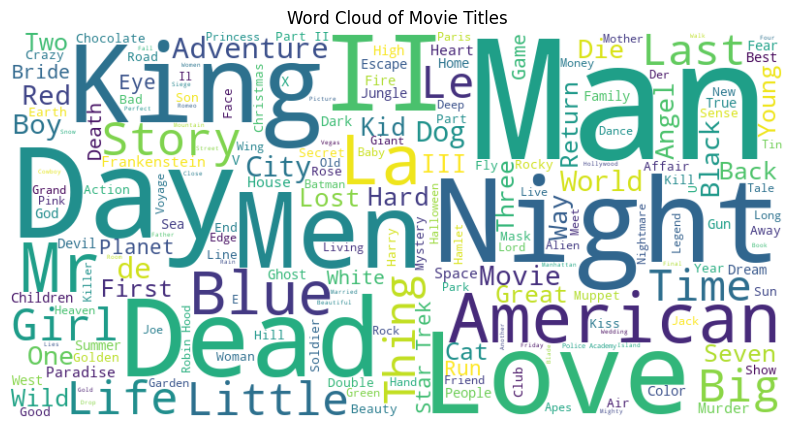

/var/folders/3j/w1l38cfj2x1_r71n0krg1xnm0000gp/T/ipykernel_34765/3897032771.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_movie_df['Title_Length'] = cluster_movie_df['Title'].str.len()



Title Length Statistics:
count    2309.000000
mean       16.786488
std         9.316776
min         1.000000
25%        10.000000
50%        15.000000
75%        21.000000
max        72.000000
Name: Title_Length, dtype: float64


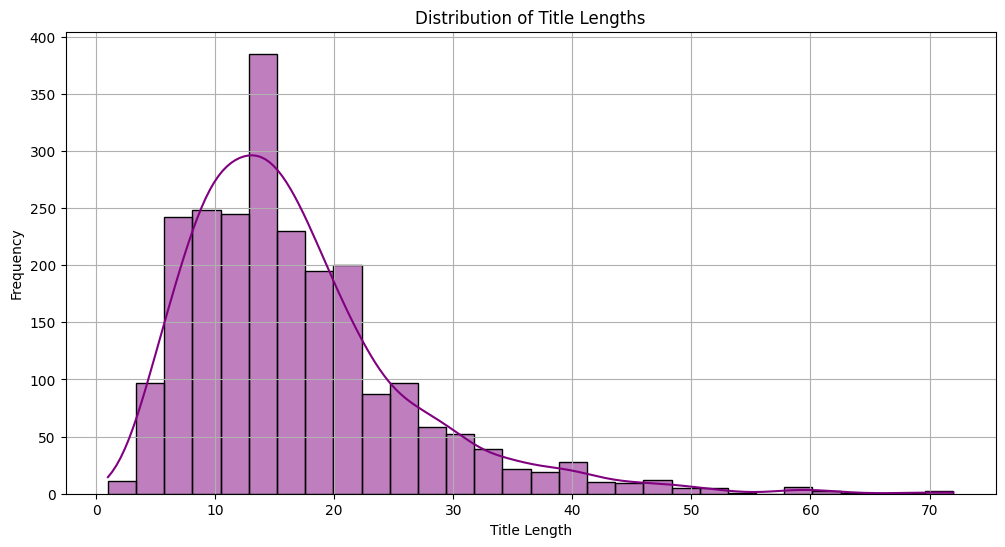


Top 5 Similar Titles to the First Movie:
                    Similarity
Title                         
Toy Story             1.000000
Toy Story 2           1.000000
L.A. Story            0.604377
Christmas Story, A    0.392261
Soldier's Story, A    0.381231


In [164]:
get_movie_cluster(4)